In [15]:
import pandas as pd
import torch
from transformers import RobertaTokenizerFast, RobertaModel
import umap
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the pretrained RoBERTa model and tokenizer
model_path = "./mlm_checkpoints/CoV-RoBERTa_128"
model = RobertaModel.from_pretrained(model_path)
# to cuda
# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

tokenizer = RobertaTokenizerFast.from_pretrained("./tok/")

# Variant names
variants = ["Alpha", "Beta", "Gamma", "Delta", "Omicron", "Eris"]

# Load the datasets
dataframes = {}
for variant in variants:
    file_path = f"./data/unique_{variant}_2k.csv"
    dataframes[variant] = pd.read_csv(file_path)[:2000]

# Function to create embeddings with batch tokenization
def create_embeddings(df, model, tokenizer, device, batch_size=200):
    sequences = df['sequence'].tolist()
    embeddings = []
    for i in tqdm(range(0, len(sequences), batch_size), desc=f"Processing {len(sequences)} sequences in batches"):
        batch = sequences[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.extend(batch_embeddings)
    return embeddings

# Create embeddings for each variant
embeddings = {}
for variant in variants:
    print(f"----------- {variant} -----------")
    embeddings[variant] = create_embeddings(dataframes[variant], model, tokenizer, device)

# Combine embeddings and labels for UMAP
all_embeddings = []
all_labels = []
for variant in variants:
    all_embeddings.extend(embeddings[variant])
    all_labels.extend([variant] * len(embeddings[variant]))




Some weights of the model checkpoint at ./mlm_checkpoints/CoV-RoBERTa_128 were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at ./mlm_checkpoints/CoV-RoBERTa_128 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and i

----------- Alpha -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 48.86it/s]


----------- Beta -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 35.38it/s]


----------- Gamma -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 39.88it/s]


----------- Delta -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 46.82it/s]


----------- Omicron -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 36.16it/s]


----------- Eris -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 29.96it/s]


In [16]:
# Perform UMAP and merge close points
umap_embeddings = umap.UMAP().fit_transform(all_embeddings)

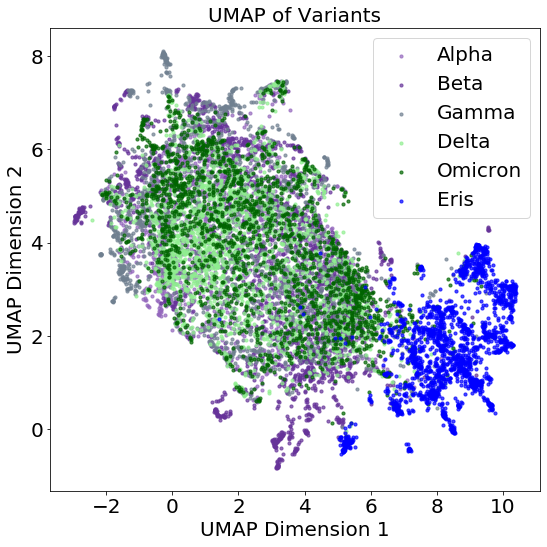

In [18]:
# Plot UMAP
plt.figure(figsize=(8, 8))
for variant in variants:
    indices = [i for i, label in enumerate(all_labels) if label == variant]
    # smaller dots
    plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], label=variant if variant != "New" else "New Omicron",
                alpha=0.7, s=10, color=["tab:purple", "rebeccapurple", "slategrey", "lightgreen", "darkgreen", "blue"][variants.index(variant)])
    
font_size = 20
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.legend()
plt.title("UMAP of Variants")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.tick_params(axis='x', labelsize=font_size)
plt.tick_params(axis='y', labelsize=font_size)
# xtick as integer values 2 by 2
plt.xticks(range(-2, 11, 2))
plt.tight_layout()
plt.savefig("figures/umap_variants.pdf")
plt.show()

In [19]:
import pandas as pd
import torch
from transformers import RobertaTokenizerFast, RobertaModel
import umap
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the pretrained RoBERTa model and tokenizer
model_path = "./mlm_checkpoints/CoV-RoBERTa_128"
model = RobertaModel.from_pretrained(model_path)
# to cuda
# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

tokenizer = RobertaTokenizerFast.from_pretrained("./tok/")

# Variant names
variants = ["Omicron", "New", "Eris"]

# Load the datasets
dataframes = {}
for variant in variants:
    file_path = f"./data/unique_{variant}_2k.csv"
    dataframes[variant] = pd.read_csv(file_path)[:2000]

# Function to create embeddings with batch tokenization
def create_embeddings(df, model, tokenizer, device, batch_size=200):
    sequences = df['sequence'].tolist()
    embeddings = []
    for i in tqdm(range(0, len(sequences), batch_size), desc=f"Processing {len(sequences)} sequences in batches"):
        batch = sequences[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.extend(batch_embeddings)
    return embeddings

# Create embeddings for each variant
embeddings = {}
for variant in variants:
    print(f"----------- {variant} -----------")
    embeddings[variant] = create_embeddings(dataframes[variant], model, tokenizer, device)

# Combine embeddings and labels for UMAP
all_embeddings = []
all_labels = []
for variant in variants:
    all_embeddings.extend(embeddings[variant])
    all_labels.extend([variant] * len(embeddings[variant]))



Some weights of the model checkpoint at ./mlm_checkpoints/CoV-RoBERTa_128 were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at ./mlm_checkpoints/CoV-RoBERTa_128 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and i

----------- Omicron -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 36.64it/s]


----------- New -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 29.30it/s]


----------- Eris -----------


Processing 2000 sequences in batches: 100%|██████████| 10/10 [00:00<00:00, 29.27it/s]


In [20]:
# Perform UMAP
umap_embeddings_new = umap.UMAP().fit_transform(all_embeddings)


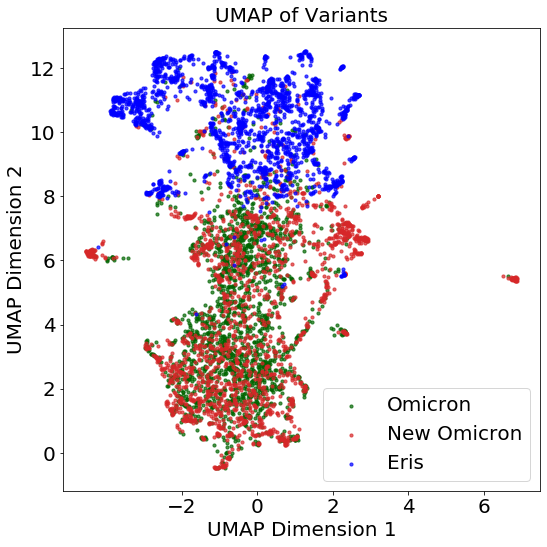

In [22]:
# Plot UMAP
plt.figure(figsize=(8, 8))
for variant in variants:
    indices = [i for i, label in enumerate(all_labels) if label == variant]
    plt.scatter(umap_embeddings_new[indices, 0], umap_embeddings_new[indices, 1], label=variant if variant != "New" else "New Omicron",
                alpha=0.7, s=10, color=["darkgreen", "tab:red", "blue"][variants.index(variant)])
    
font_size = 20
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.legend()
plt.title("UMAP of Variants")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.tick_params(axis='x', labelsize=font_size)
plt.tick_params(axis='y', labelsize=font_size)
plt.xticks(range(-2, 7, 2))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("figures/umap_variants_new.pdf")
plt.show()

In [7]:
from sklearn.metrics.pairwise import paired_cosine_distances, paired_euclidean_distances, paired_manhattan_distances

v1 = [1, 1, 1]
v2 = [421421, 2321, 3233]
cosine_distance = paired_cosine_distances([v1], [v2])
cosine_similarity = 1 - cosine_distance
euclidean_distance = paired_euclidean_distances([v1], [v2])
manhattan_distance = paired_manhattan_distances([v1], [v2])

print(f"Cosine distance: {cosine_distance}")
print(f"Euclidean distance: {euclidean_distance}")
print(f"Manhattan distance: {manhattan_distance}")

# now using torch.functional
import torch
import torch.nn.functional as F
v1 = torch.tensor(v1, dtype=torch.float32)
v2 = torch.tensor(v2, dtype=torch.float32)
cosine_similarity = F.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0))
cosine_distance = 1 - cosine_similarity
euclidean_distance = F.pairwise_distance(v1.unsqueeze(0), v2.unsqueeze(0), p=2)
manhattan_distance = F.pairwise_distance(v1.unsqueeze(0), v2.unsqueeze(0), p=1)

print(f"Cosine distance: {cosine_distance}")
print(f"Euclidean distance: {euclidean_distance}")
print(f"Manhattan distance: {manhattan_distance}")

Cosine distance: [0.41506679]
Euclidean distance: [421438.77921235]
Manhattan distance: [426972.]
Cosine distance: tensor([0.4151])
Euclidean distance: tensor([421438.7812])
Manhattan distance: tensor([426972.])
